# COVID-19 SITUATION IN SOUTH KOREA ANALYSIS 

## INTRODUCTION

### GOAL
Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country have to __create and prove a plan of fighting the pandemics in your country by analyzing the provided data__. You must get the most critical insights using learned data science techniques and present them to the lead of your country.

### APROACH
* Overview of Covid-19 cases in South Korea.
* Analysis of Covid-19 cases in South Korea by age, sex.
* Analysis of Covid-19 cases distribution in South Korea's provinces.
* Analysis of Covid-19 group cases by age, sex.
* Analysis of Covid-19 cases distribution in time.
* Analysis of South Koreas policies regarding Covid-19 situation.
* Keyword in *Naver* portal analysis.
* Relationship between Covid-19 cases and weather trends in South Korea analysis.
* Analysis of treatment lenght of Covid-19 patients in South Korea.
* Death rate in different age groups analysis.

### DATA USED
<br> Covid-19 of South Korea data from Kaggle will be used for analysis, the link to the Kaggle dataset is [here](https://www.kaggle.com/kimjihoo/coronavirusdataset/). Data covers time period of the first Covid-19 wave from 19th January, 2020 to 28th June, 2020. 
Data contains 11 datasets about different parameters regarding Covid-19 situation in South Korea, in further analysis these datasets will be used:
* PatientInfo
* Case
* Policy
* SearchTrend
* Time
* TimeAge
* TimeGender
* Weather.

<br>The main dataset in further analysis is *PatientInfo* containting explicit data about 5164 patients.

## IMPORT OF PACKAGES AND DATA LOADING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import plotly.express as px

Loading data, using pandas module:

In [2]:
cases = pd.read_csv("Case.csv")

patients = pd.read_csv("PatientInfo.csv")

policy = pd.read_csv("Policy.csv")

regions = pd.read_csv("Region.csv")

searches = pd.read_csv("SearchTrend.csv")

floating = pd.read_csv("SeoulFloating.csv")

time = pd.read_csv("Time.csv")

time_age = pd.read_csv("TimeAge.csv")

time_gender = pd.read_csv("TimeGender.csv")

time_province = pd.read_csv("TimeProvince.csv")

weather = pd.read_csv("Weather.csv")

Let's take a look at *patients* dataset:

In [3]:
patients.head()

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

## DATA CLEANING

Getting data about null values in each column and data types:

In [4]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


Visually presenting density of null values in patients dataset:

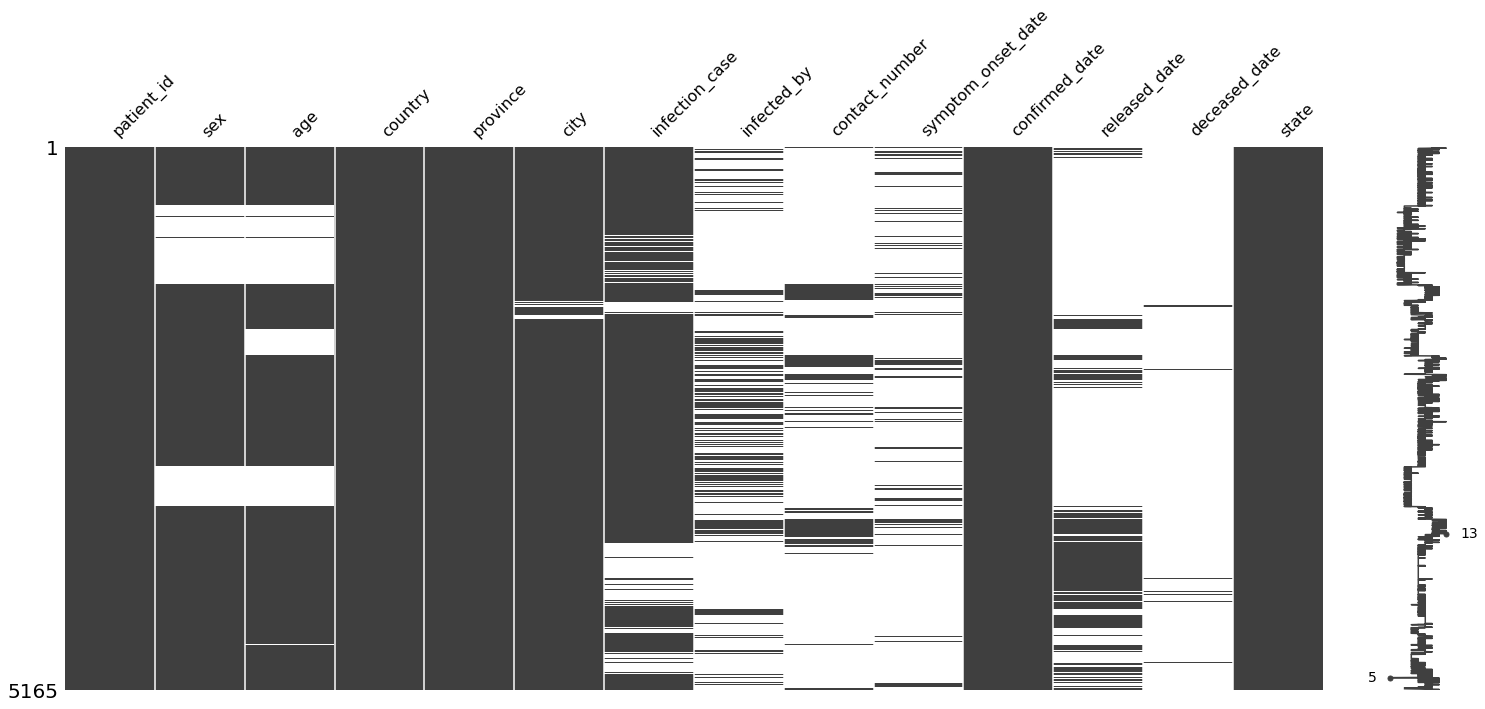

In [5]:
msno.matrix(patients);

Checking for duplicated values:

In [6]:
patients.duplicated().any()

False

*Patients* dataset contains 5164 entries and 14 columns, representing different values. It may be seen that *patients* dataset contains noticeable part of null values, which will be dealt with further in this section.

Filling null values in columns - sex, age, country, province, city, infection_case, infected_by -  with word *'unknown'*:

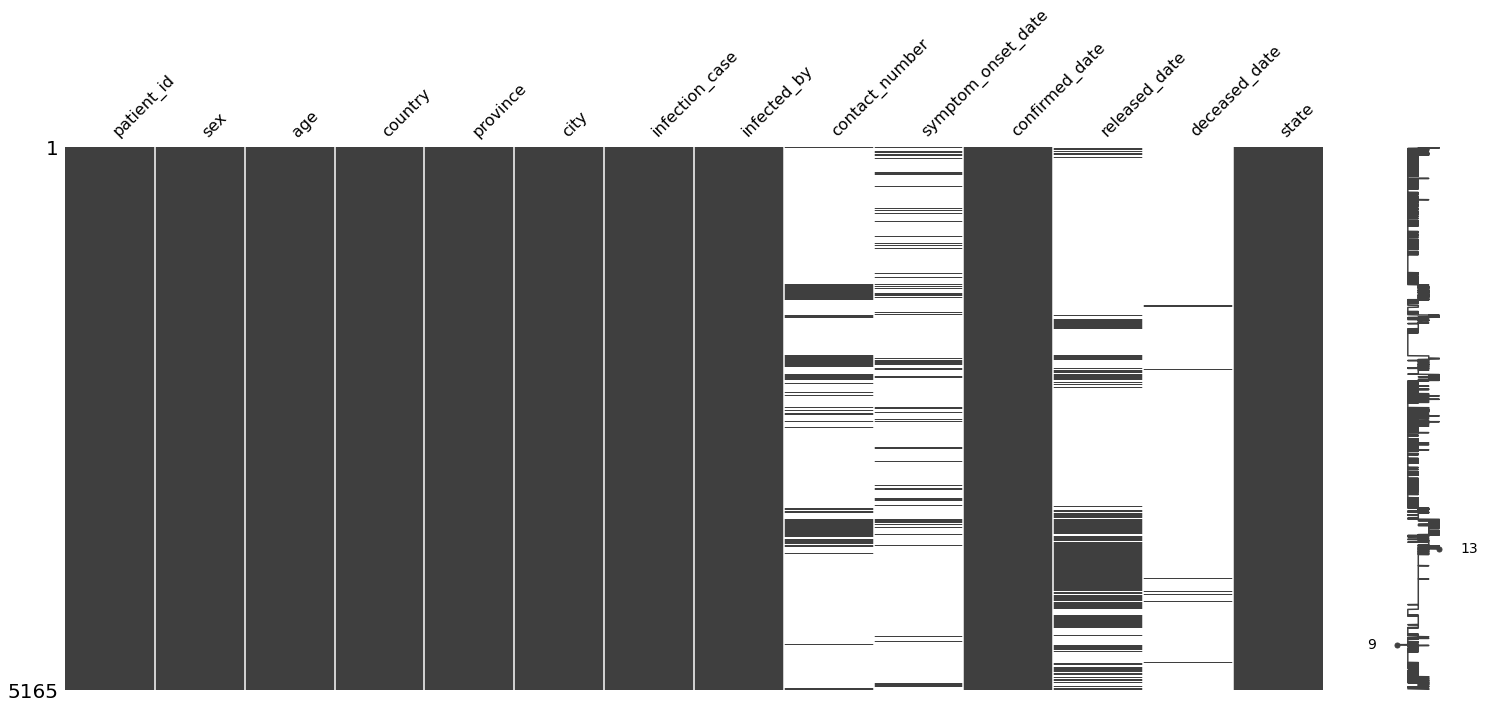

In [7]:
patients.loc[:, "sex":"infected_by"] = patients.loc[:, "sex":"infected_by"].fillna(
    value="unknown"
)
msno.matrix(patients);

It was decided not to fill null date values with unknown as it my cause problems when dealing with data types.

In [8]:
patients.head()

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow     unknown             75         2020-01-22   
1       overseas inflow     unknown             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow     unknown              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

Checking sex feature for false values:

In [9]:
patients["sex"].unique()

array(['male', 'female', 'unknown'], dtype=object)

Checking age feature for false values:

In [10]:
patients["age"].unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', 'unknown', '100s'], dtype=object)

Checking state feature for false values:

In [11]:
patients["state"].unique()

array(['released', 'deceased', 'isolated'], dtype=object)

Values of *sex* and *age*, *state* features seems logical, therefore, further analysis will be performed.
<br>Checking *contact_number* feature for false values:

In [12]:
contacts = patients["contact_number"]
contacts.unique()

array(['75', '31', '17', '9', '2', '43', '0', '68', '6', '23', '117',
       '27', '8', nan, '4', '3', '1', '1000000796', '13', '12', '1091',
       '131', '16', '14', '485', '19', '296', '15', '34', '37', '22', '7',
       '10', '28', '21', '5', '25', '18', '159', '11', '30', '41', '71',
       '38', '24', '185', '69', '39', '1160', '450', '65', '156', '47',
       '86', '74', '46', '64', '66', '40', '20', '42', '107', '29', '26',
       '45', '-', '95', '422', '290', '32', '53', '70', '35', '51', '130',
       '106', '174', '78', '33', '89', '61', '113', '36', '6100000098',
       '6100000099', '87', '84', '140', '72'], dtype=object)

Replacing '-' value with zero in order to perform outliers analysis:

In [13]:
contacts.replace(to_replace="-", value="0", inplace=True)

Shape of contacts data series:

In [14]:
contacts.shape

(5165,)

Dropping null values:

In [15]:
contacts.dropna(inplace=True)

Shape of contacts data series after removing null values:

In [16]:
contacts.shape

(791,)

Converting string data type to integer and getting statistical describtion of the feature in order to perform calculations:

In [17]:
contacts = contacts.astype("int64")
contact_stats = contacts.describe()
contact_stats

count    7.910000e+02
mean     1.668776e+07
std      3.085280e+08
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.400000e+01
max      6.100000e+09
Name: contact_number, dtype: float64

From basic statistic values of *contact_number* feature it may be already seen that __max__ is not logical as it is claimed that a person had more than 6 billion contacts after appearance of symptoms. Therefore, further analysis of outiers will be performed.

### IDENTIFYING OUTLIERS WITH INTERQARTILE RANGE (IQR) METHOD

Number of outlier points in *contact_number* column, based on IQR method:

In [18]:
# Calculating IQR of 'contact_number' feature
Q1 = contact_stats.loc["25%"]
Q3 = contact_stats.loc["75%"]

IQR = Q3 - Q1

outliers_num = ((contacts < (Q1 - 1.5 * IQR)) | (contacts > (Q3 + 1.5 * IQR))).sum()
outliers_num

77

Percentage part of data saved after removing null values in *contact_number* column:

In [19]:
len(contacts) / len(patients) * 100

15.31461761858664

Percentage part of outliers in saved data in *contact_number* column:

In [20]:
outliers_num / len(contacts) * 100

9.734513274336283

Unfortunately, *contact_number* column is not usable, because the major part of data is lost due to null values and outliers. This columns will not be used in further analysis in order to keep analysis as precise as possible, consequently it was decided to remove it from dataset.

In [21]:
# Removing contact_number column from dataset
patients.drop(columns=["contact_number"], inplace=True)

Parsing dates in columns, containing date values in string format:

In [22]:
patients.loc[:, "symptom_onset_date":"deceased_date"] = patients.loc[
    :, "symptom_onset_date":"deceased_date"
].apply(pd.to_datetime, format="%Y-%m-%d", errors="coerce")

*Patients* dataset info and visualization after data cleaning:

In [23]:
patients.head()

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by symptom_onset_date confirmed_date  \
0       overseas inflow     unknown         2020-01-22     2020-01-23   
1       overseas inflow     unknown                NaT     2020-01-30   
2  contact with patient  2002000001                NaT     2020-01-30   
3       overseas inflow     unknown         2020-01-26     2020-01-30   
4  contact with patient  1000000002                NaT     2020-01-31   

  released_date deceased_date     state  
0    2020-02-05           NaT  released  
1    2020-03-02           NaT  released  
2    2020-02-19           NaT  released  
3    2020-02-15           NaT  released  
4    2020-02-24           NaT  released

In [24]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          5165 non-null   int64         
 1   sex                 5165 non-null   object        
 2   age                 5165 non-null   object        
 3   country             5165 non-null   object        
 4   province            5165 non-null   object        
 5   city                5165 non-null   object        
 6   infection_case      5165 non-null   object        
 7   infected_by         5165 non-null   object        
 8   symptom_onset_date  689 non-null    datetime64[ns]
 9   confirmed_date      5162 non-null   datetime64[ns]
 10  released_date       1587 non-null   datetime64[ns]
 11  deceased_date       66 non-null     datetime64[ns]
 12  state               5165 non-null   object        
dtypes: datetime64[ns](4), int64(1), object(8)
memory

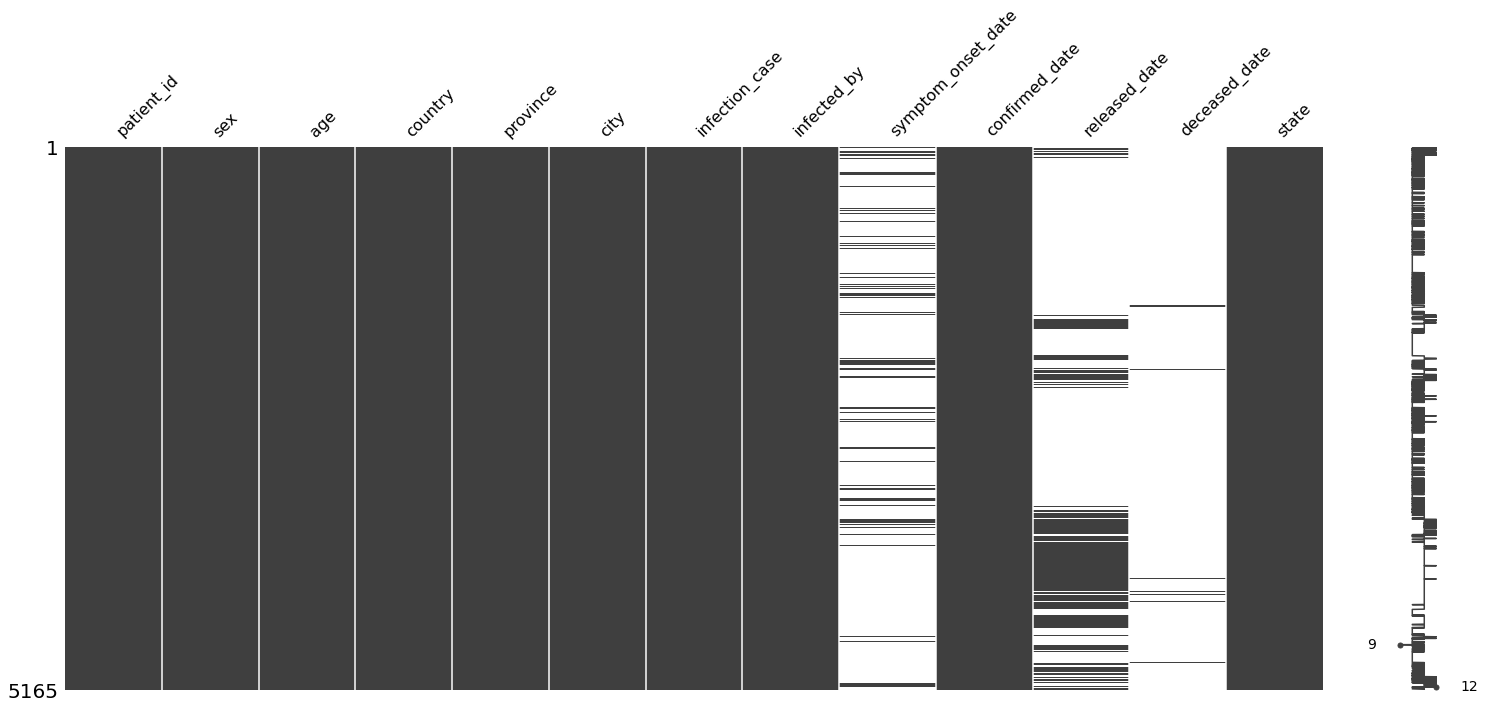

In [25]:
msno.matrix(patients);

Most of the columns are filled after data cleaning, also column *contact_number* was lost. It was decided to leave columns about dates in dataset eventhough they have null values as it may contain important data.

# EXPLORATORY DATA ANALYSIS

### MAP VISUALIZATION OF COVID-19 CASES DISTRIBUTON IN SOUTH KOREA

In [26]:
cases_map = cases.copy()
cases_map = cases_map[cases_map[["latitude", "longitude"]] != "-"]
cases_map[["latitude", "longitude"]] = cases_map[["latitude", "longitude"]].apply(
    pd.to_numeric, errors="coerce", axis=1
)
cases["confirmed"].astype("float")

mapbox_access_token = "pk.eyJ1IjoiZXJpa3V0ZWVlZWVlZWVlIiwiYSI6ImNrczllcXR5MTFqbWkybnMzZXhkZzE4Y24ifQ.qw4X8rxpRQ_Eni8uXvqBZQ"
import plotly.express as px

fig = px.scatter_mapbox(
    text="<br>City: " + cases["city"] + " <br>Province: " + cases["province"],
    lat=cases_map["latitude"],
    lon=cases_map["longitude"],
    color=cases["confirmed"],
    size=cases["confirmed"],
    color_continuous_scale="RdBu",
    size_max=100,
    mapbox_style="light",
    zoom=6,
    title="COVID-19 CASES IN SOUTH KOREA",
    width=1000,
    height=600,
)

fig.update_layout(
    autosize=True,
    hovermode="closest",
    margin=dict(l=10, r=10, t=40, b=20),
    coloraxis_colorbar=dict(
        title="CONFIRMED<br>CASES",
    ),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(lon=128.466, lat=35.888),
        pitch=0,
        zoom=5,
    ),
)
fig.show()

Grouping data by province:

In [27]:
grouped_by_province = (
    cases.groupby("province")
    .agg(count=("confirmed", "sum"))
    .sort_values(by="count", ascending=False)
)

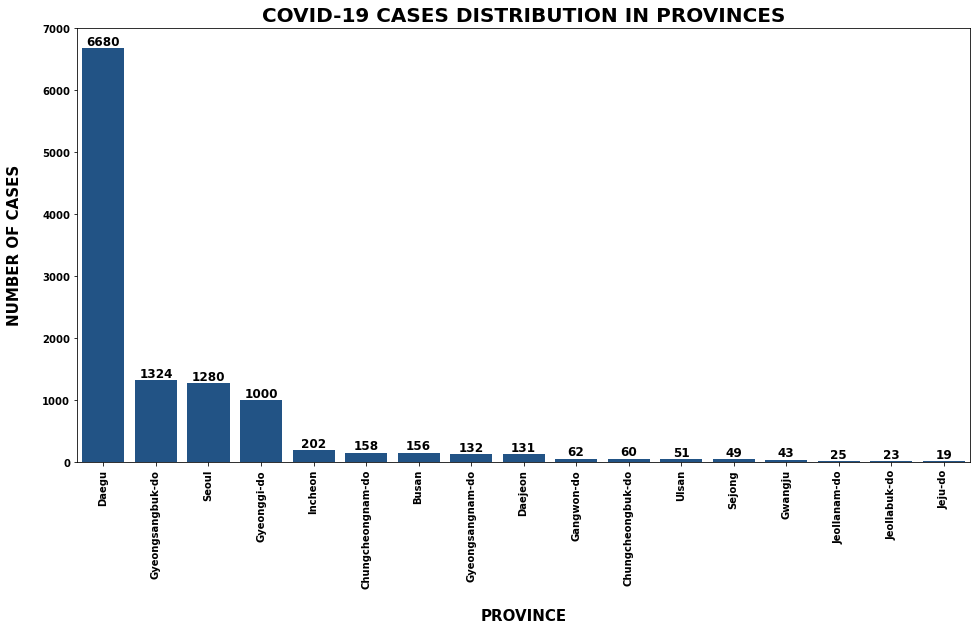

In [28]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(
    x=grouped_by_province.index, y=grouped_by_province["count"], color="#115396"
)
plt.xlabel("PROVINCE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("COVID-19 CASES DISTRIBUTION IN PROVINCES", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=90)


def bar_values(ax):
    """presenting bar value on top"""
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = f"{int(p.get_height())}"
        ax.text(
            _x,
            _y,
            value,
            verticalalignment="bottom",
            ha="center",
            fontsize=12,
            fontweight="semibold",
        )


bar_values(ax)

From visualizations it may be seen that most of Covid-19 cases in the first wave of virus were mostly recorded in __Daegu, Gyeongsangbuk-do__ and __Seoul, Geyonggi-do__ provinces.
<br>Gyeongsangbuk-do, Geyonggi-do and Seoul are the most populated provinces in South Korea, consequently, there are good conditions for virus to spread. 
<br>Source: Published by: L. Yoon, &amp; 16, A. (2021, August 16). South Korea: Population by province 2020. Statista. https://www.statista.com/statistics/747332/south-korea-population-by-province/. 
<br>"Daegu, in South Korea, was host to the first large coronavirus outbreak outside of China. The city has reported a total of 6,807 cases since the outbreak started there in late February. The spread of infections at a church in Daegu drove a massive spike in cases in South Korea beginning in late February." Source: Written by: Josh Smith, J. (n.d.). This South Korean city once had the biggest Coronavirus outbreak outside of CHINA. now it's reported zero new cases. World Economic Forum. https://www.weforum.org/agenda/2020/04/south-korean-daegu-china-coronavirus-covid19-cases-virus/. 

### GENERAL OBSERVATIONS

Getting main data about *patients* dataset:

In [29]:
patients.describe(include="object")

sex      age country province          city        infection_case  \
count     5165     5165    5165     5165          5165                  5165   
unique       3       12      16       17           164                    52   
top     female  unknown   Korea    Seoul  Gyeongsan-si  contact with patient   
freq      2218     1380    5123     1312           639                  1610   

       infected_by     state  
count         5165      5165  
unique         607         3  
top        unknown  released  
freq          3819      2929

The dataset accounts for 5165 Covid-19 cases in South Korea. It may be seen that women are reported to be more frequent patients from this infection. Unfortunately, the age group of most patients is not known. As we noticed before, most of the cases are recorded in Seoul province. In addition, it may be seen that the most of patients had contact with other ill person and got the infection, but the actual contact cannot be traced.

In [30]:
patients.describe(include="datetime64[ns]", datetime_is_numeric=True).loc[
    ["min", "max"], :
]

symptom_onset_date       confirmed_date        released_date  \
min  2020-01-19 00:00:00  2020-01-20 00:00:00  2020-02-05 00:00:00   
max  2020-06-28 00:00:00  2020-06-30 00:00:00  2020-06-28 00:00:00   

           deceased_date  
min  2020-02-19 00:00:00  
max  2020-05-25 00:00:00

From the table above it may be seen that first case with Covid-19 symptos was recorded on 19 January, 2020 and Covid-19 was confirmed the day after. First death is recorded month after first cases confimation on 19 February, 2020.

### COVID-19 CASES DISTRIBUTION ANALYSIS BY SEX AND AGE 

Grouping *time_gender* data by sex:

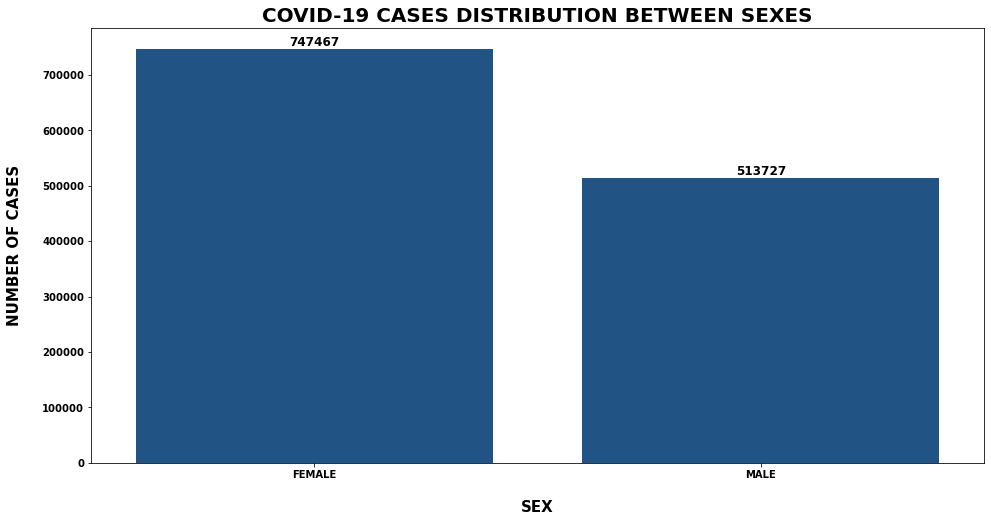

In [31]:
grouped_by_sex = time_gender.groupby("sex").agg({"confirmed": "sum"})

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=grouped_by_sex.index, y=grouped_by_sex["confirmed"], color="#115396")
plt.xlabel("SEX", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("COVID-19 CASES DISTRIBUTION BETWEEN SEXES", size=20, weight="bold")
ax.set_xticklabels(["FEMALE", "MALE"], size=10, fontweight="bold")
plt.yticks(fontweight="bold")
bar_values(ax)

Data represents that majority of patients are women.

Grouping *time_age* data by age:

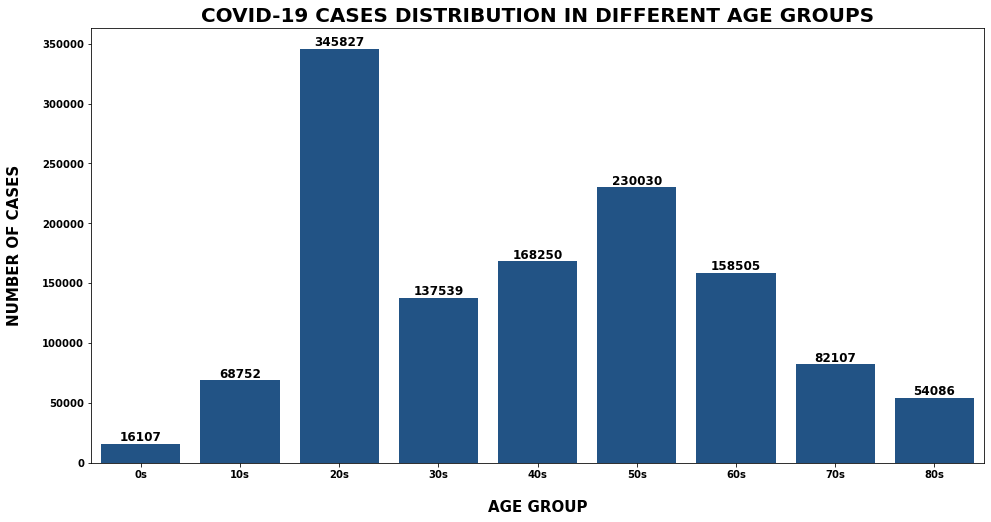

In [32]:
grouped_by_age = time_age.groupby("age").agg({"confirmed": "sum"})
order = ["0s", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s"]
grouped_by_age = grouped_by_age.loc[order]

fig, ax = plt.subplots(figsize=(16, 8))
index = grouped_by_age.index
sns.barplot(x=index, y=grouped_by_age["confirmed"], color="#115396", order=order)
plt.xlabel("AGE GROUP", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("COVID-19 CASES DISTRIBUTION IN DIFFERENT AGE GROUPS", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
bar_values(ax)

It may be noticed that most of the patients are in 20s and 50s. It is important to stress that people of various age are affected by virus.

Grouping *patients* data by sex and age:

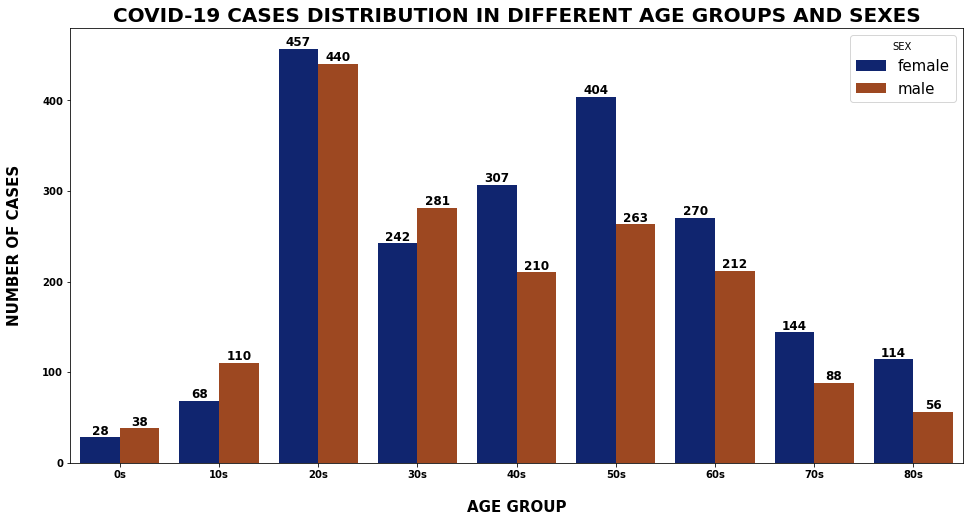

In [33]:
grouped_by_age_sex = patients.groupby(["sex", "age"]).agg(count=("age", "count"))
grouped_by_age_sex.drop(labels="unknown", axis=0, inplace=True)
grouped_by_age_sex.reset_index(inplace=True)


fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(
    x="age", y="count", hue="sex", data=grouped_by_age_sex, order=order, palette="dark"
)
plt.xlabel("AGE GROUP", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title(
    "COVID-19 CASES DISTRIBUTION IN DIFFERENT AGE GROUPS AND SEXES",
    size=20,
    weight="bold",
)
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
plt.legend(loc="upper right", title="SEX", fontsize=15)
bar_values(ax)

From the data above it may be seen that infection rate among minors and elderly is lower than in other age groups. Two spikes can be seen - people in 20s and women in their 50s are more often affected by Covid-19 infection.
<br>In addition, there are more patient women in age groups from 40s, the reason behind that might be longer average lifetime of women.
<br>Unfortunately, considerable amount of data is unknown.

### INFECTION CASES ANALYSIS

Grouping data by case type, this time using *cases* dataset as it represents more cases:

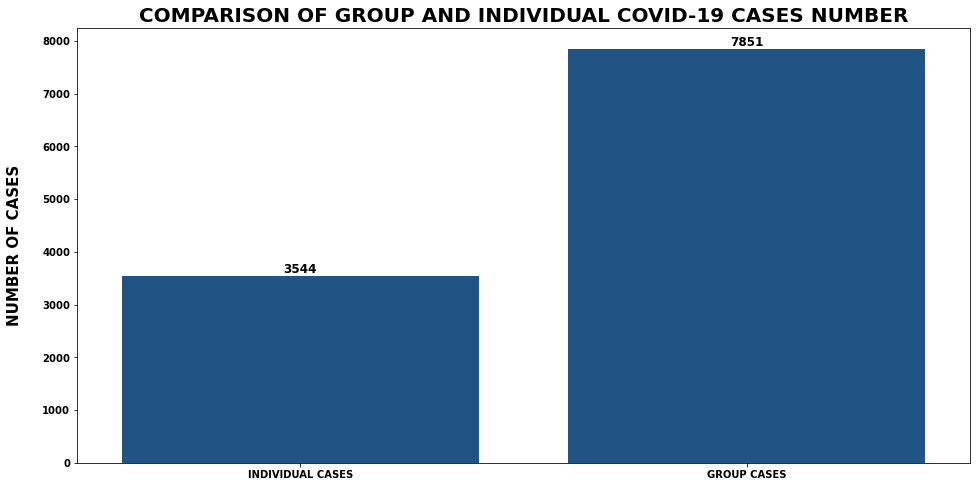

In [34]:
group_ind_cases = cases.groupby("group").agg(number_of_cases=("confirmed", "sum"))

fig, ax = plt.subplots(figsize=(16, 8))
index = grouped_by_age.index
sns.barplot(
    x=group_ind_cases.index, y=group_ind_cases["number_of_cases"], color="#115396"
)
plt.xlabel("")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title(
    "COMPARISON OF GROUP AND INDIVIDUAL COVID-19 CASES NUMBER", size=20, weight="bold"
)
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["INDIVIDUAL CASES", "GROUP CASES"]
ax.set_xticklabels(labels)
bar_values(ax)

It may be seen clearly that group cases dominates in data, it is logical as Covid-19 'virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe.'
<br>Source: World Health Organization. (n.d.). Coronavirus disease (COVID-19): How is it Transmitted? World Health Organization. https://www.who.int/news-room/q-a-detail/coronavirus-disease-covid-19-how-is-it-transmitted. 

Further analysis of infection cases will be performed.
<br>Grouping data by infection case and presenting cases, which appeared more than 50 times:

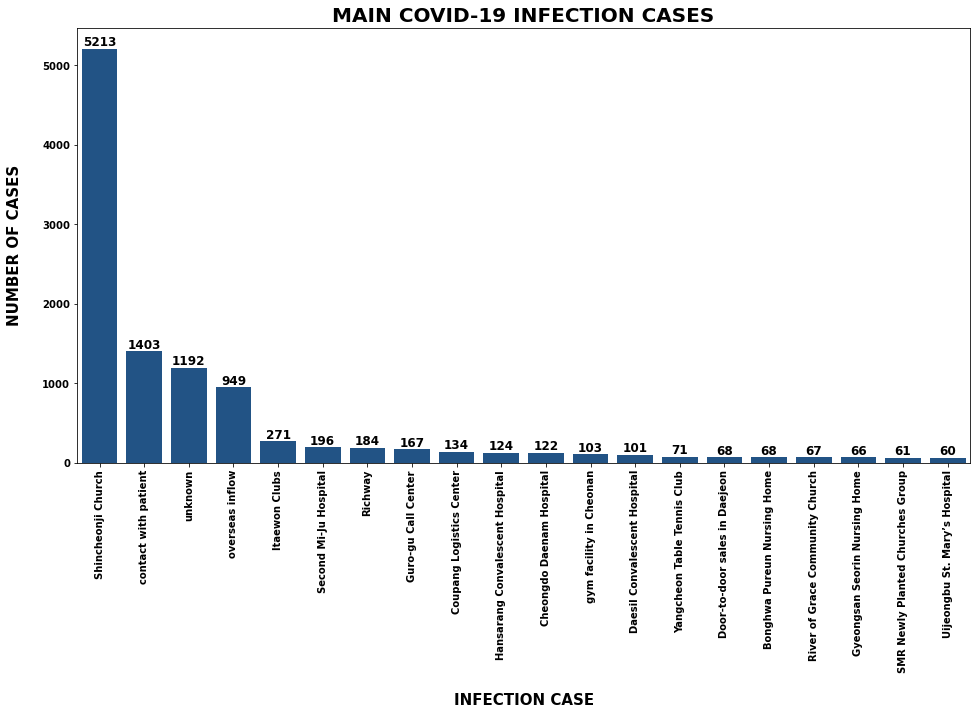

In [35]:
# Replacing value 'etc' with unknown
cases["infection_case"].replace(to_replace="etc", value="unknown", inplace=True)

# Grouping by infection case
grouped_by_infcase = (
    cases.groupby("infection_case")
    .agg(count=("confirmed", "sum"))
    .sort_values(by="count", ascending=False)
)

# Taking only main cases (count > 50)
mask = grouped_by_infcase > 50

# Dropping null values
grouped_by_infcase50 = grouped_by_infcase[mask].dropna()

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(
    x=grouped_by_infcase50.index, y=grouped_by_infcase50["count"], color="#115396"
)
plt.xlabel("INFECTION CASE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("MAIN COVID-19 INFECTION CASES", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=90)
bar_values(ax)

Chart above represents main locations, where people got infected by Covid-19. It is possible to see certain paterns in data as majority of places are hospitals and religion related places. In order for data to be more conclusive, locations were assigned to more abstract groups.

In [36]:
# Grouping cases into more abstract groups

cases_groups = {
    "religious events": ["church", "churches", "christ", "pilgrimage", "pastors group"],
    "medical institutions": ["hospital", "medical", "nursing"],
    "social events": ["clubs", "orange town", "gathering", "karaoke"],
    "door-to-door sales": ["richway", "door-to-door"],
    "workplace": ["call center", "logistics", "ministry", "insurance", "manufacture", "station", "orange life",],
    "sport event": ["tennis", "gym"],
    "children care facilities": ["day care", "kindergarten"],
    "accomodation facilities": ["apt"],
    "shopping centers": ["town"],
    "community places": ["shelter", "community center"],
    "collective cases": ["familly", "collective", "brothers", "daezayeon korea"],
    "education events": ["class", "studying", "institute", "study"],
    "unknown": ["unknown", "ect"],
    "contact with patient": ["contact", "patient"],
    "overseas inflow": "overseas inflow",
}


def assign_group(x: str) -> str:
    """Assigniing string to a group from dictionary"""
    x = x.lower()

    for key, values in cases_groups.items():
        for item in values:
            if item in x:
                return key


# Adding column into datasets
patients["case_group"] = patients["infection_case"].apply(assign_group)
cases["case_group"] = cases["infection_case"].apply(assign_group)

Representing main infection cases groups:

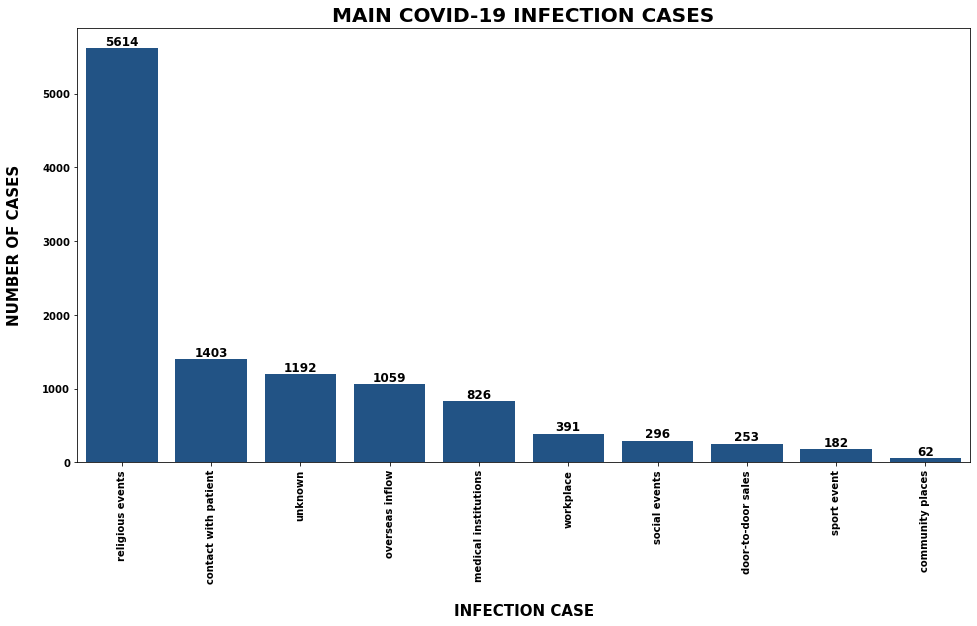

In [37]:
# Getting main infection cases from cases dataset
cases_cases = (
    cases.groupby("case_group")
    .agg(count=("confirmed", "sum"))
    .sort_values(by=["count"], ascending=False)
)

# Taking only main cases (count > 50)
mask = cases_cases > 50

# Dropping null values
cases_cases = cases_cases[mask].dropna()

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=cases_cases.index, y=cases_cases["count"], color="#115396")
plt.xlabel("INFECTION CASE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("MAIN COVID-19 INFECTION CASES", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=90)
bar_values(ax)

Data represents a huge religiuos events contribution to the spread of Covid-19 infection, more precisely, it was a meeting of religious organization Shincheonji in the city of Daegu, which will be discussed in further analysis.
<br>It can me noticed that virus spreaded mostly in public places.
<br>In addition, contact with infected person was the reason behind vast number of cases together with overseas inflow.
<br>It is important to stress that infection spread quickly in medical institutions such as hospitals and nursing homes, the reason behind that possibly was the lack of protection instruments, for example, medical masks and respirators.
<br>Unfortunately, reasons behind a lot of cases are still unknown.

Main groups of infection cases will now be analysed based on patient sex.

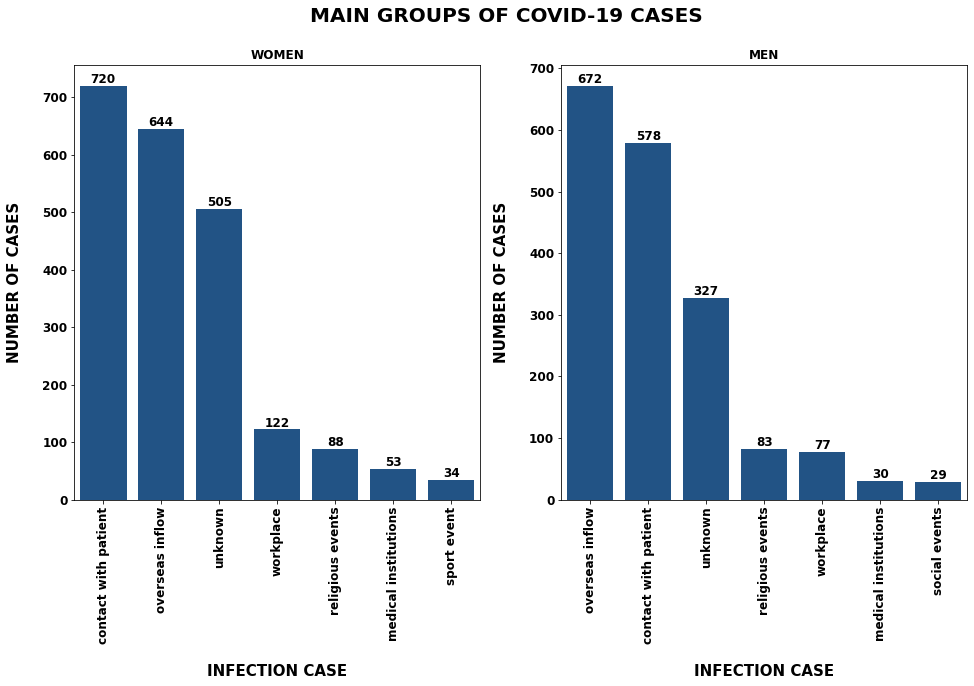

In [38]:
# Grouping data based on new categories regarding cases
cases_groups_sex = patients.groupby(["sex", "case_group"]).agg(
    count=("patient_id", "count")
)
cases_groups_sex.drop(labels="unknown", axis=0, inplace=True)
cases_groups_sex.reset_index(inplace=True)

# Getting most popular female cases
mask_casesFg = (cases_groups_sex["count"] > 20) & (cases_groups_sex["sex"] == "female")
cases_groups_female = cases_groups_sex[mask_casesFg].sort_values(
    by=["count"], ascending=False
)

# Getting most popular male cases
mask_caseMg = (cases_groups_sex["count"] > 20) & (cases_groups_sex["sex"] == "male")
cases_groups_male = cases_groups_sex[mask_caseMg].sort_values(
    by=["count"], ascending=False
)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle(
    "MAIN GROUPS OF COVID-19 CASES",
    fontsize=20,
    weight="bold",
)

chart0 = sns.barplot(
    ax=axes[0], data=cases_groups_female, x="case_group", y="count", color="#115396"
)
chart0.set_xticklabels(chart0.get_xticklabels(), rotation=90)
chart0.set_ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
chart0.set_xlabel("INFECTION CASE", size=15, labelpad=20, fontweight="bold")
plt.setp(axes[0].get_xticklabels(), fontsize=12, fontweight="bold")
plt.setp(axes[0].get_yticklabels(), fontsize=12, fontweight="bold")
axes[0].set_title("WOMEN", size=12, weight="bold")

chart1 = sns.barplot(
    ax=axes[1], data=cases_groups_male, x="case_group", y="count", color="#115396"
)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart1.set_ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
chart1.set_xlabel("INFECTION CASE", size=15, labelpad=20, fontweight="bold")
plt.setp(axes[1].get_xticklabels(), fontsize=12, fontweight="bold")
plt.setp(axes[1].get_yticklabels(), fontsize=12, fontweight="bold", visible=True)
axes[1].set_title("MEN", size=12, weight="bold")

# presenting bar values
for ax in axes:
    bar_values(ax)

It may be seen that infection cases are similar regarding sexes.

Analysing infection cases in largest patient groups - people in their 20s and women in their 50s.

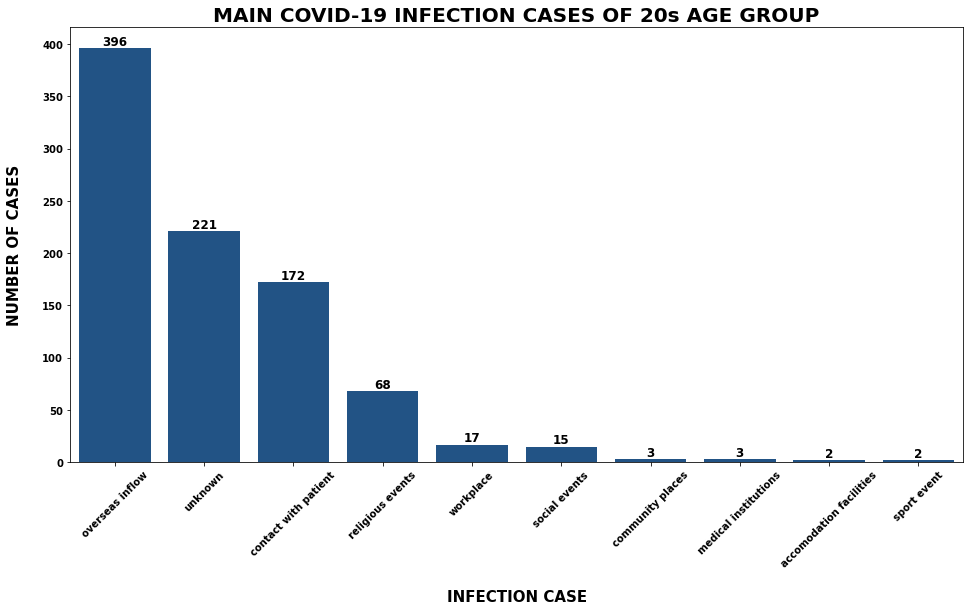

In [39]:
# Getting main infection cases of people in 20s
patients_20s = patients[patients["age"] == "20s"]
cases_20s = (
    patients_20s.groupby(["case_group"])
    .agg(count=("case_group", "count"))
    .sort_values(by=["count"], ascending=False)
)

fig, ax = plt.subplots(figsize=(16, 8))
index = cases_20s.index
data = cases_20s["count"]
sns.barplot(x=index, y=data, color="#115396")
plt.xlabel("INFECTION CASE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("MAIN COVID-19 INFECTION CASES OF 20s AGE GROUP", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=45)

# presenting bar values
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = f"{int(p.get_height())}"
    ax.text(
        _x,
        _y,
        value,
        verticalalignment="bottom",
        ha="center",
        fontsize=12,
        fontweight="semibold",
    )

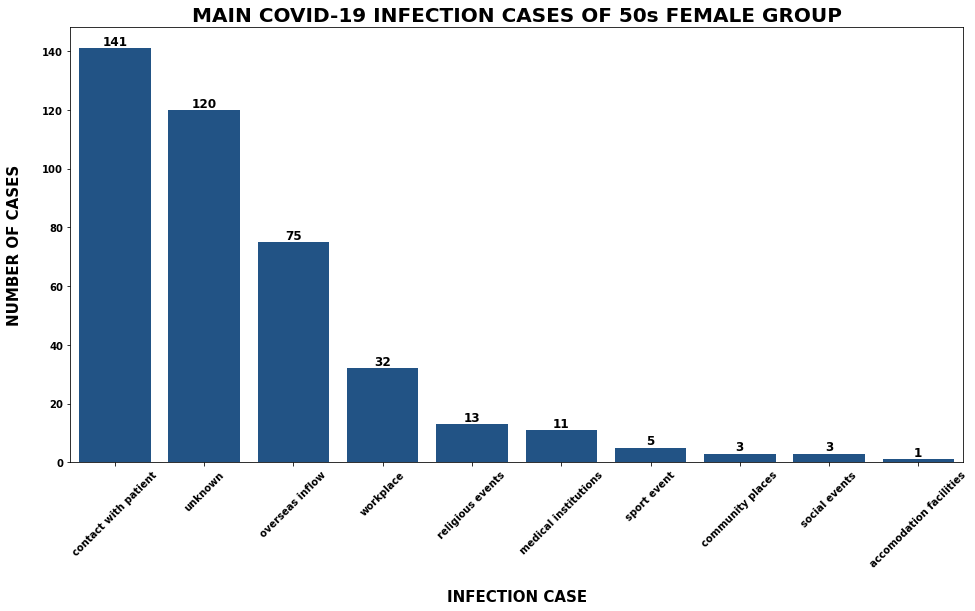

In [40]:
# Getting main infection cases of women in 50s
patients_50sfemale = patients[
    (patients["age"] == "50s") & (patients["sex"] == "female")
]
cases_50sfemale = (
    patients_50sfemale.groupby(["case_group"])
    .agg(count=("case_group", "count"))
    .sort_values(by=["count"], ascending=False)
)

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=cases_50sfemale.index, y=cases_50sfemale["count"], color="#115396")
plt.xlabel("INFECTION CASE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("MAIN COVID-19 INFECTION CASES OF 50s FEMALE GROUP", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=45)

# presenting bar values
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = f"{int(p.get_height())}"
    ax.text(
        _x,
        _y,
        value,
        verticalalignment="bottom",
        ha="center",
        fontsize=12,
        fontweight="semibold",
    )

The main reason behind infected in their 20s is overseas inflow, while women 50s got infected mostly by the contact with patients. This difference lead to assumptions that young people probably travel more, while 50-59 year old women had more contacts with patients, that might be because they more usually work in medicine field or take care of sick familly members.
There are not noticeable differences in infection cases in different age groups therefore assumptions may be made that people of different age and sex get infected in similar places.
<br>Only small dataset was analysed, so results should not be generalized.

### COVID-19 DAILY CASES AND GOVERNMENT POLICIES ANALYSIS

Grouping data by confirmed case date and sex.

In [41]:
# Grouping data by confirmed case date
grouped_by_date_total = patients.groupby(["confirmed_date"]).agg(
    count=("confirmed_date", "count")
)

# Groping data by confirmed date and sex
grouped_by_date_sex = (
    patients.groupby(["confirmed_date", "sex"])
    .agg(count=("confirmed_date", "count"))
    .reset_index()
)

# Women daily cases
woman_daily_cases = grouped_by_date_sex[grouped_by_date_sex["sex"] == "female"]
woman_daily_cases.set_index("confirmed_date", inplace=True)

# Men daily cases
man_daily_cases = grouped_by_date_sex[grouped_by_date_sex["sex"] == "male"]
man_daily_cases.set_index("confirmed_date", inplace=True)

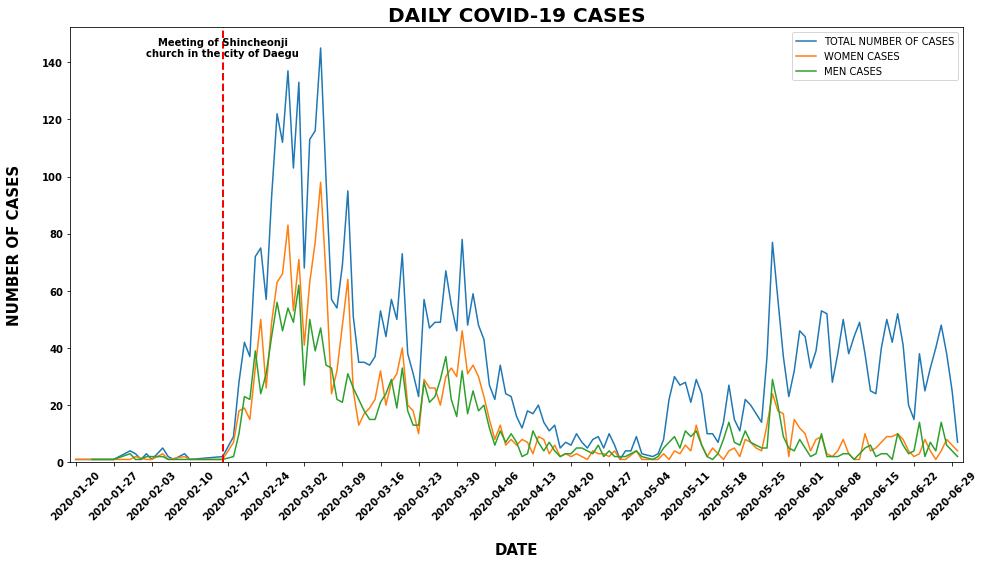

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    y=grouped_by_date_total["count"],
    x=grouped_by_date_total.index,
    palette="dark",
    label="TOTAL NUMBER OF CASES",
)
sns.lineplot(
    y=woman_daily_cases["count"],
    x=woman_daily_cases.index,
    palette="dark",
    label="WOMEN CASES",
)
sns.lineplot(
    y=man_daily_cases["count"],
    x=man_daily_cases.index,
    palette="dark",
    label="MEN CASES",
)

plt.axvline(x="2020-02-16", color="red", linewidth=2, linestyle="--")
ax.annotate(
    "Meeting of Shincheonji\nchurch in the city of Daegu",
    xy=("2020-02-16", 142),
    ha="center",
    weight="bold",
)

plt.legend()
plt.xlabel("DATE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("DAILY COVID-19 CASES", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=45)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax.set_ylim(ymin=0)
ax.set_xlim(xmin="2020-01-19", xmax="2020-07-01");

It may be seen that number of infection cases peaked from the middle of February to the beginning of March.
<br>Red line represents the date of meeting of Shincheonji church, which contributed a lot to spread of virus in the country.
<br>
<br>
"The rapid spread of COVID-19 in South Korea is attributed to a superspreading event within a religious group called Shincheonji in the city of Daegu. This led to an explosive outbreak in the city of Daegu and Gyeongsangbuk-do." 
<br>Source: https://pmj.bmj.com/content/96/1137/399


The decrease of infection cases is related to great variety of government policies in the country. Government policies will be represented below.
<br>Source: https://www.csis.org/analysis/timeline-south-koreas-response-covid-19

Alert policies in South Korea:

In [43]:
# Goverment alerts policies
policy[policy["type"] == "Alert"]

policy_id country   type                      gov_policy            detail  \
0          1   Korea  Alert  Infectious Disease Alert Level    Level 1 (Blue)   
1          2   Korea  Alert  Infectious Disease Alert Level  Level 2 (Yellow)   
2          3   Korea  Alert  Infectious Disease Alert Level  Level 3 (Orange)   
3          4   Korea  Alert  Infectious Disease Alert Level     Level 4 (Red)   

   start_date    end_date  
0  2020-01-03  2020-01-19  
1  2020-01-20  2020-01-27  
2  2020-01-28  2020-02-22  
3  2020-02-23         NaN

Even though first Covid-19 cases in South Korea was confirmed only on 20 of January, 2020, government's policies started way earlier, while virus was spreading mostly in China. It may be seen that strictness of policies escalated quickly and reached the highest alert level in the end of February. It possibly led to the decrease of number of cases in the beginning of March.
Other policies are represented in the plot below.

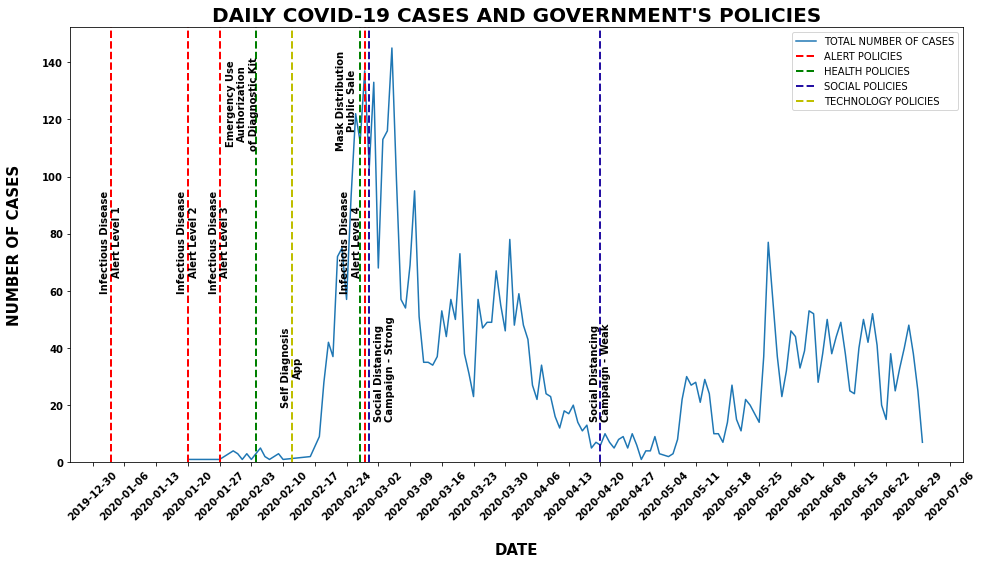

In [44]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    y=grouped_by_date_total["count"],
    x=grouped_by_date_total.index,
    palette="dark",
    label="TOTAL NUMBER OF CASES",
)

# alert policies
plt.axvline(
    x="2020-01-03", color="red", linewidth=2, linestyle="--", label="ALERT POLICIES"
)
ax.annotate(
    "Infectious Disease\nAlert Level 1",
    xy=("2020-01-03", 60),
    ha="center",
    weight="bold",
    rotation=90
)
plt.axvline(x="2020-01-20", color="r", linewidth=2, linestyle="--")
ax.annotate(
    "Infectious Disease\nAlert Level 2",
    xy=("2020-01-20", 60),
    ha="center",
    weight="bold",
    rotation=90
)
plt.axvline(x="2020-01-27", color="r", linewidth=2, linestyle="--")
ax.annotate(
    "Infectious Disease\nAlert Level 3",
    xy=("2020-01-27", 60),
    ha="center",
    weight="bold",
    rotation=90
)
plt.axvline(x="2020-02-28", color="red", linewidth=2, linestyle="--")
ax.annotate(
    "Infectious Disease\nAlert Level 4",
    xy=("2020-02-25", 60),
    ha="center",
    weight="bold",
    rotation=90
)

# health policies
plt.axvline(
    x="2020-02-27", color="green", linewidth=2, linestyle="--", label="HEALTH POLICIES"
)
ax.annotate(
    "Mask Distribution\nPublic Sale",
    xy=("2020-02-24", 110),
    ha="center",
    weight="bold",
    rotation=90
)
plt.axvline(x="2020-02-04", color="green", linewidth=2, linestyle="--")
ax.annotate(
    "Emergency Use\nAuthorization\nof Diagnostic Kit",
    xy=("2020-02-01", 110),
    ha="center",
    weight="bold",
    rotation=90
)

# social policies
plt.axvline(
    x="2020-02-29",
    color="#2410a3",
    linewidth=2,
    linestyle="--",
    label="SOCIAL POLICIES",
)
ax.annotate(
    "Social Distancing\nCampaign - Strong",
    xy=("2020-03-01", 15),
    ha="left",
    weight="bold",
    rotation=90
)
plt.axvline(x="2020-04-20", color="#2410a3", linewidth=2, linestyle="--")
ax.annotate(
    "Social Distancing\nCampaign - Weak",
    xy=("2020-04-20", 15),
    ha="center",
    weight="bold",
    rotation=90
)

# technology policies
plt.axvline(
    x="2020-02-12", color="y", linewidth=2, linestyle="--", label="TECHNOLOGY POLICIES"
)
ax.annotate("Self Diagnosis\nApp",
            xy=("2020-02-12", 20),
            ha="center",
            weight="bold",
           rotation=90)

plt.legend()
plt.xlabel("DATE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("DAILY COVID-19 CASES AND GOVERNMENT'S POLICIES", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", rotation=45)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax.set_ylim(ymin=0);

The plot represents the most important government's restrictions during the beginning of Covid-19 period, it may be seen that there were a few different categories of policies, but the most important thing in quick government's reaction, which led to control of virus spreading. It is crucial to stress inovative solutions that were used in South Korea,such as self diagnosis app, also they had a strict policy regarding distribution of medical masks, so that everyone has one.

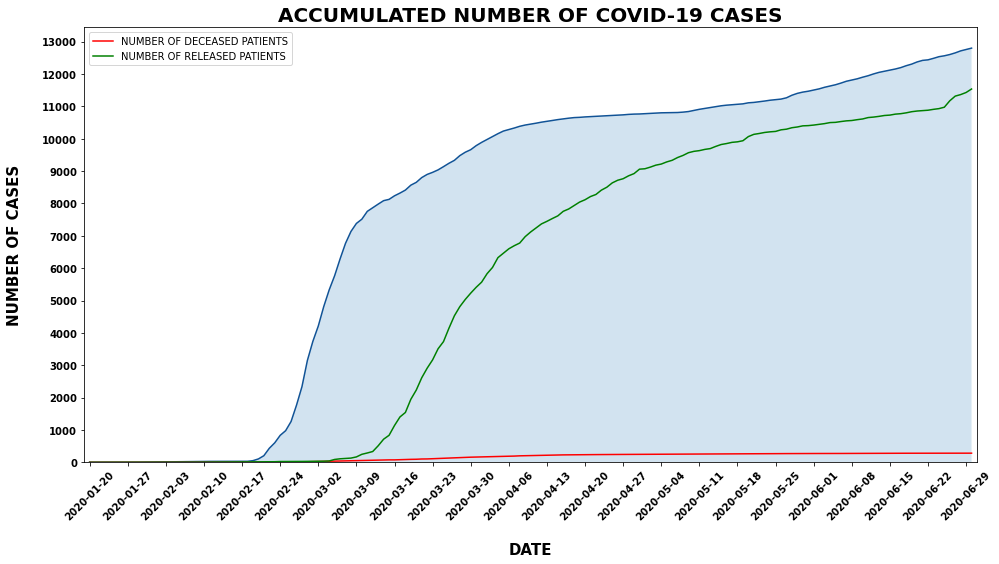

In [45]:
# Parsing dates in time dataset
time["date"] = time["date"].apply(pd.to_datetime, format="%Y-%m-%d", errors="coerce")

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(y=time["confirmed"], x=time["date"], color="#115396")
plt.fill_between(time["date"].values, time["confirmed"].values, alpha=0.2)
sns.lineplot(
    y=time["deceased"], x=time["date"], color="r", label="NUMBER OF DECEASED PATIENTS"
)
sns.lineplot(
    y=time["released"], x=time["date"], color="g", label="NUMBER OF RELEASED PATIENTS"
)


# plt.legend()
plt.xlabel("DATE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
plt.title("ACCUMULATED NUMBER OF COVID-19 CASES", size=20, weight="bold")
plt.yticks(np.arange(0, 14000, 1000), fontweight="bold")
plt.xticks(fontweight="bold", rotation=45)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax.set_ylim(ymin=0)
ax.set_xlim(xmin="2020-01-19", xmax="2020-07-01");

The plot above represents number of accumulated Covid-19 cases during the beginning of virus period.
<br>It may be seen that from the end of February to beginning of March number of cases was escalating fastly, the process began to stabilize in the end of March. It is important to stress that number of deceased patients is low comparing with total number of cases, that means that South Korea's medical system managed to deal with extreme cases of infection.

### KEYWORD SEARCHES IN NAVER PORTAL ANALYSIS

'Naver (derived from navigate) is currently Korea's number one search engine and accounts for over 70% of the search market there.'  Source: https://www.navercorp.com/en/naver/company
<br>It is just natural that people started to look information about Covid-19 online as it was something the humankind have never heard of before, the plot below represents the searching trends of main keywords related to Covid-19 and number of daily cases in the first half of 2020.

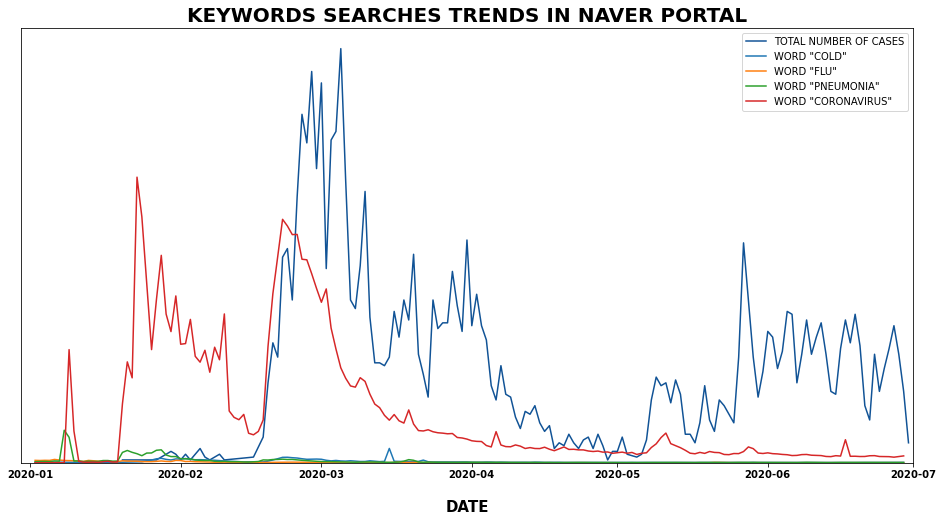

In [46]:
# Parsing dates
searches["date"] = searches["date"].apply(
    pd.to_datetime, format="%Y-%m-%d", errors="coerce"
)

# Getting searches data from the beginning of 2020
searches2020 = searches[searches["date"] > "2020-01-01"]

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    y=grouped_by_date_total["count"],
    x=grouped_by_date_total.index,
    palette="dark",
    label="TOTAL NUMBER OF CASES",
    color="#115396",
)
sns.lineplot(
    y=searches2020["cold"], x=searches2020["date"], palette="dark", label='WORD "COLD"'
)
sns.lineplot(
    y=searches2020["flu"], x=searches2020["date"], palette="dark", label='WORD "FLU"'
)
sns.lineplot(
    y=searches2020["pneumonia"],
    x=searches2020["date"],
    palette="dark",
    label='WORD "PNEUMONIA"',
)
sns.lineplot(
    y=searches2020["coronavirus"],
    x=searches2020["date"],
    palette="dark",
    label='WORD "CORONAVIRUS"',
)

plt.legend()
plt.xlabel("DATE", size=15, labelpad=20, fontweight="bold")
plt.ylabel("")
plt.title("KEYWORDS SEARCHES TRENDS IN NAVER PORTAL", size=20, weight="bold")
plt.xticks(fontweight="bold")
ax.yaxis.set_ticks([])
ax.set_ylim(ymin=0)
ax.set_xlim(xmin="2019-12-30", xmax="2020-07-01");

It may be seen that most of citiziens were searching information about corona virus specifically. There are three clear spikes in searches data, one of them is in the middle of January, when first case of Covid-19 was recorded. The last spike is seen around the time, when situation escalated quickly in South Korea.
Searching trends of corona virus related keywords started decrease from March, the reason behind that may be that more information about the infection was gathered and presented for people through other information forms.

### RELATIONSHIP BETWEEN SPREAD OF VIRUS AND WEATHER ANALYSIS

Usually viruses spread more rapildly in colder periods of the year, the intention is to check, wheather this statement is true for Corona virus. Weather of Gyeonggi-do province was chosen, because it is the largest province of South Korea.

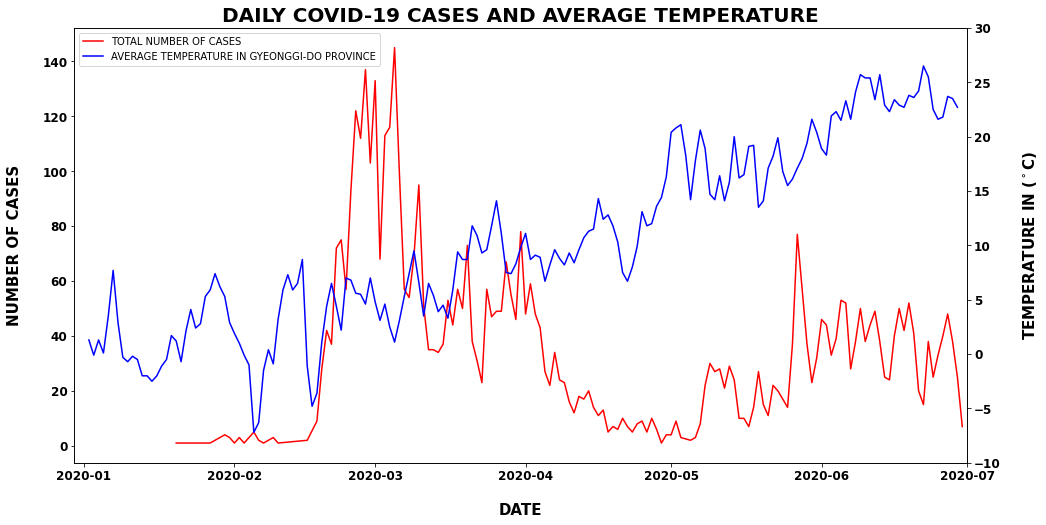

In [47]:
# Parsing dates
weather["date"] = weather["date"].apply(
    pd.to_datetime, format="%Y-%m-%d", errors="coerce"
)

# Getting data about weather in Gyeonggi-do province
weather_Daegu = weather[
    (weather["province"] == "Gyeonggi-do") & (weather["date"] > "2020-01-01")
]

fig, ax = plt.subplots(figsize=(16, 8))
twin1 = ax.twinx()

p1 = twin1.plot(
    weather_Daegu["date"],
    weather_Daegu["avg_temp"],
    label="AVERAGE TEMPERATURE IN GYEONGGI-DO PROVINCE",
    color="b",
)
p2 = ax.plot(
    grouped_by_date_total.index,
    grouped_by_date_total["count"],
    label="TOTAL NUMBER OF CASES",
    color="r",
)

plt.title("DAILY COVID-19 CASES AND AVERAGE TEMPERATURE", size=20, weight="bold")
ax.set_xlabel("DATE", size=15, labelpad=20, fontweight="bold")
ax.set_ylabel("NUMBER OF CASES", size=15, labelpad=20, fontweight="bold")
twin1.set_ylabel(r"TEMPERATURE IN ($^\circ$C)", size=15, labelpad=20, fontweight="bold")
plt.setp(ax.get_xticklabels(), fontsize=12, fontweight="bold")
plt.setp(ax.get_yticklabels(), fontsize=12, fontweight="bold", visible=True)
plt.setp(twin1.get_yticklabels(), fontsize=12, fontweight="bold", visible=True)
ax.set_xlim("2019-12-30", "2020-07-01")
twin1.set_ylim(-10, 30)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = twin1.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax.legend(lines, labels, loc=2)

It may be seen that the spreading of corona virus decreased when wheather started to warm up, however, data is not conclusive as only short period of time is covered.

### AVERAGE DURATION OF TREATMENT ANALYSIS

It is known that a lot of patients were hospitalized during Covid-19 crisis and it is important to know the expected duration of treatment for various groups of patients in order to prepare enough places in hospitals and medical centers.

In [48]:
# Calculating average length of treatment for different age and sex groups
treatment = patients.copy()

# Not using 100s and unknown age groups data as it may falsify data
treatment = treatment[(treatment["age"] != "100s") & (treatment["age"] != "unknown")]

# Dropping null values in released_date column as it is crucial for calculations
treatment = treatment[treatment["released_date"].notnull()]

# Calculating duration of treatment
treatment["treatment_days"] = (
    treatment["released_date"] - treatment["confirmed_date"]
).dt.days

# Grouping data by sex and age
treatment_grouped = (
    treatment.groupby(["sex", "age"])["treatment_days"].mean().reset_index().dropna()
)

# Creating a pivot table structure in order to present data in heat map
treatment_grouped = treatment_grouped.pivot("sex", "age", "treatment_days")

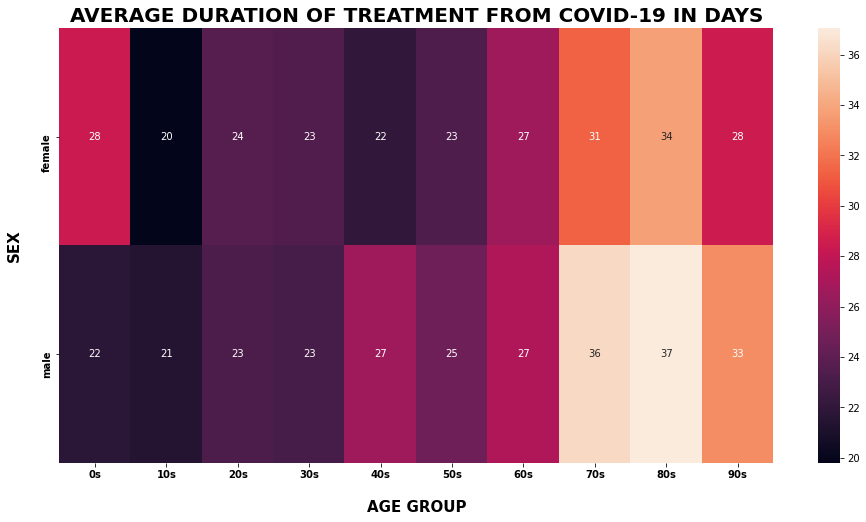

In [49]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(data=treatment_grouped, annot=True)

plt.xlabel("AGE GROUP", size=15, labelpad=20, fontweight="bold")
plt.ylabel("SEX", size=15, labelpad=20, fontweight="bold")
plt.title("AVERAGE DURATION OF TREATMENT FROM COVID-19 IN DAYS", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold");

The duration of hospitalization ranges from 20 to 37 days.
<br>Patients from age 60 have longer treatment periods from 27 to 37 days, which is almost week longer in comparison with younger patients.
<br>It may be seen that usually men have slightly longer treatment duration than women.

### DEATH RATE IN DIFFERENT AGE GROUPS ANALYSIS

People in different age groups are affected differently by Covid-19 infection, therefore death rate will be calculated in order to understand, which age groups are affected more severely by the virus.

In [50]:
# Grouping data by age
grouped_death = time_age.groupby("age").agg(
    deceased_patients=("deceased", "sum"), total_cases=("confirmed", "sum")
)

# Calculating percentage part of deceased patients
grouped_death["death_rate"] = (
    grouped_death["deceased_patients"] / grouped_death["total_cases"] * 100
)

grouped_death

deceased_patients  total_cases  death_rate
age                                            
0s                   0        16107    0.000000
10s                  0        68752    0.000000
20s                  0       345827    0.000000
30s                194       137539    0.141051
40s                295       168250    0.175334
50s               1537       230030    0.668174
60s               3743       158505    2.361440
70s               7599        82107    9.254997
80s              12136        54086   22.438339

From the table above it may be noticed young and middle-aged patients have low death rate from the virus. According to data, elderly people have more complex consequences, which more often lead to death.
<br>Coming back, to data represented before, it may be seen that patients from age 60 are affected more severely as a result, they have longer hospitalization duration and higher risk of death.

## CONCLUSION

Having analysed South Korea's I may state that this country has already done great work by reacting quickly, seriously and strictly. However, my suggestions for the future:
* Data shows that majority of cases are group cases, consequently, a lot of attention must be paid for **social distancing policies**, which allows to prevent huge outbreaks suchs as in Daegu province. Social distancing should include **remote organization of work and education** if possible as these gatherings may lead to outbreaks of infection. In addition, **other social events, for example, church gatherings should me avoidable** during pandemic period.
* Even more **strict social distancing policies** must be applied to **people from age 60** as they are more severely affected by Covid-19 infection.
* Every country must provide citiziens with **protection devices**, these should be recommended in **inside events** as usually group cases happened in inside locations.
* **Hospitals must be prepared to protect both workers and patients**, as a result protection devices and spacious wards must be provided. Also, more places must be prepared.
* A **lockdown** from other countries may help to prevent overseas inflow cases and help concentrate on countries citizens.
* **More precise data collection** may lead to better conclusions about virus and how it may defeated.

## IMPROVEMENTS OF ANALYSIS

* Different datasets represent different number of patients, so it is very difficult to connect datasets and make generalized conclusions.
* I did not manage to join a few datasets together.
* A lot of missing data may have affected analysis and results.
* Not all datasets were analysed, more attention may be paid on outliers analysis.